Predicting Usage of a Video Game Research Server
# Project Report
## Predict the number of simultaneous players on the Minecraft server for each hour of the day, using the data provided.
### Introducation



In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Classification: Can the number of hours played during the day tell us player's experience level in players.csv.
"Can we build a classifier to predict a player's experience level using their played hours and age?"




In [2]:
set.seed(2)
players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
clean_players <- players |>
mutate(experience = as_factor(experience)) |>
filter(!is.na(experience), 
       !is.na(played_hours), 
       !is.na(Age)) |>
select(experience, played_hours, Age)
clean_players

experience,played_hours,Age
<fct>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17
Regular,0.0,19
Amateur,0.0,21
Amateur,0.1,17


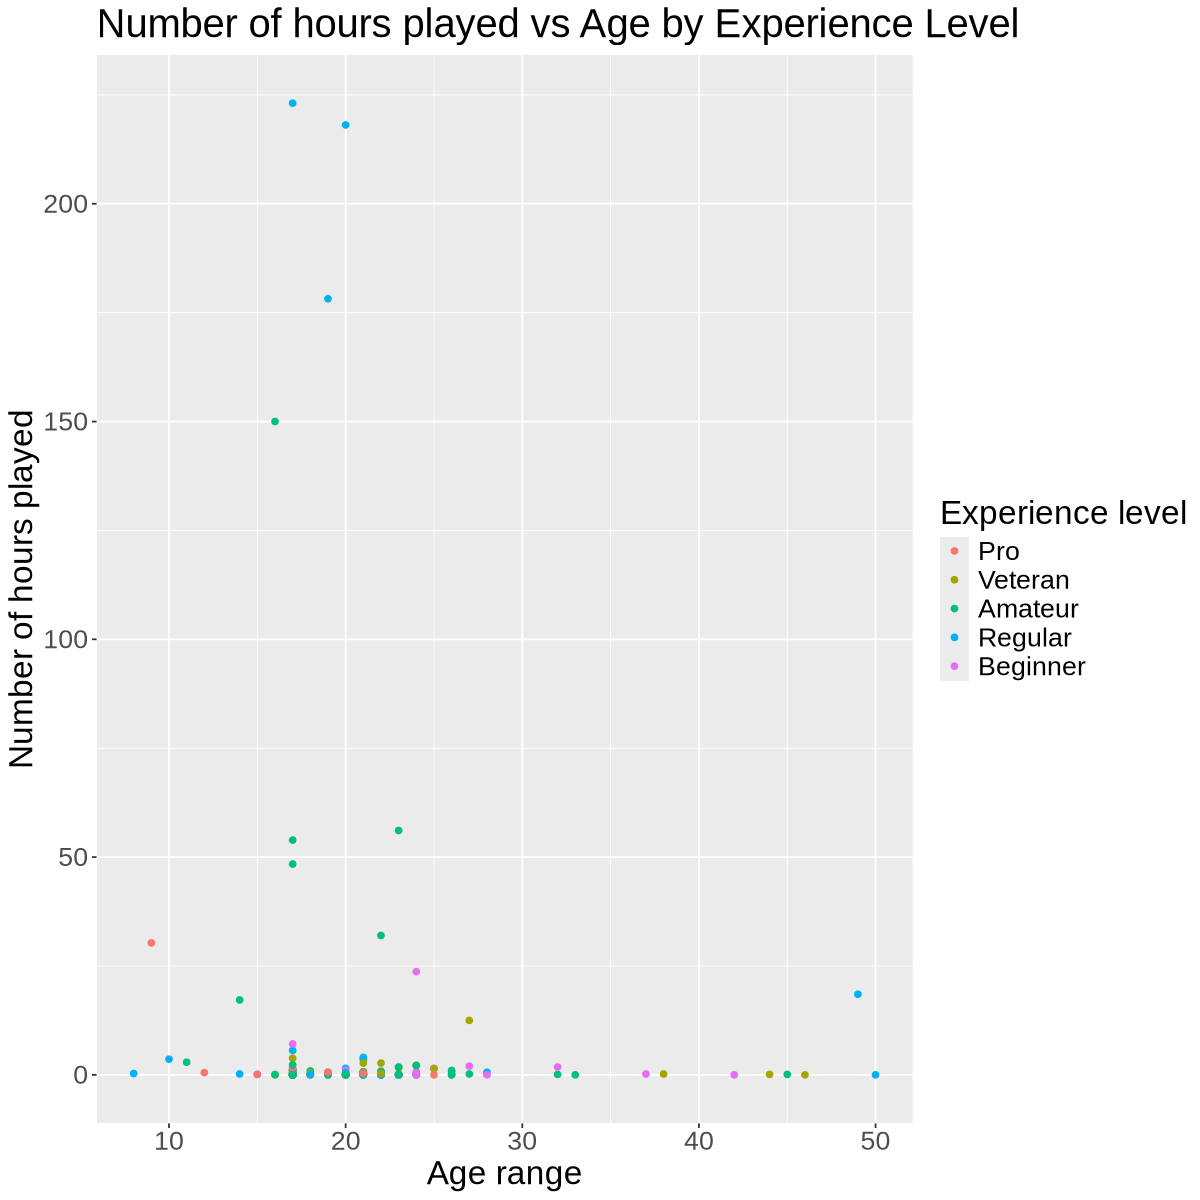

In [4]:
options(repr.plot.height = 10, repr.plot.width = 10)
clean_players_plot <- clean_players |>
        ggplot(aes(x = Age, y = played_hours, color = experience)) +
        geom_point() +
        labs(title = "Number of hours played vs Age by Experience Level", x = "Age range", y = "Number of hours played", color = "Experience level") +
        theme(text = element_text(size = 20))
clean_players_plot

In [7]:
scaled_players <- clean_players |>
  mutate(
    played_hours = as.numeric(scale(played_hours)),
    Age = as.numeric(scale(Age))
  )

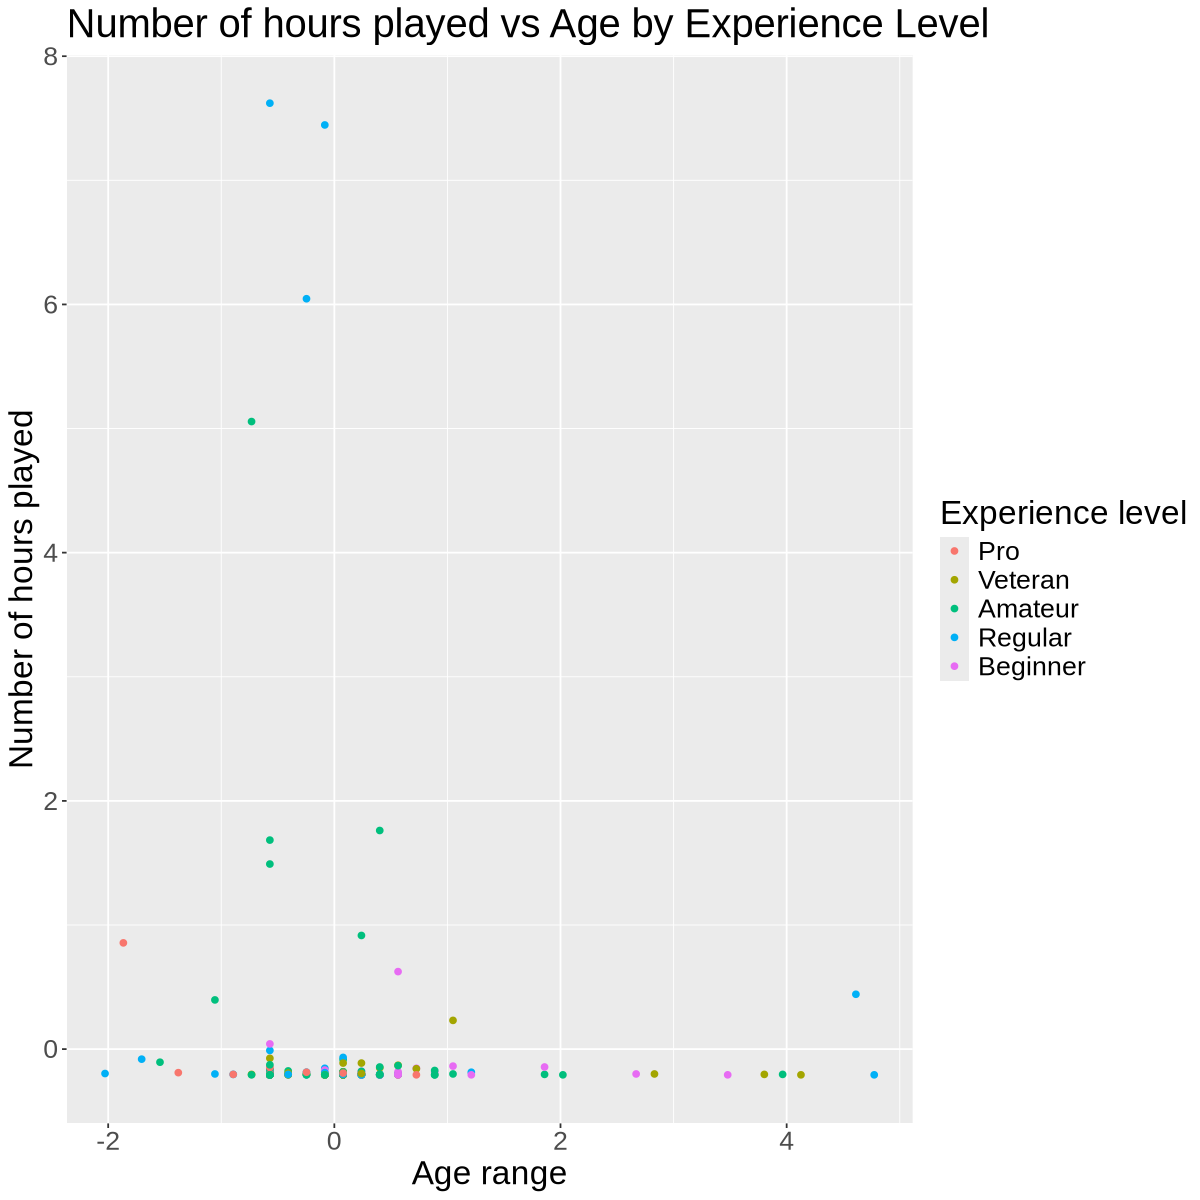

In [8]:
options(repr.plot.height = 10, repr.plot.width = 10)
scaled_players_plot <- scaled_players |>
        ggplot(aes(x = Age, y = played_hours, color = experience)) +
        geom_point() +
        labs(title = "Number of hours played vs Age by Experience Level", x = "Age range", y = "Number of hours played", color = "Experience level") +
        theme(text = element_text(size = 20))
scaled_players_plot

In [ ]:
# split data into test and training subsets for training the classification model
players_split <- initial_split(clean_players, prop = 0.75, strata = experience)
players_train <- training(players_split) 
players_test <- testing(players_split)

players_train
players_test

In [ ]:
players_recipe <- recipe(experience ~ ., data = players_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())
players_recipe

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                set_engine("kknn") |>
                set_mode("classification")

players_fit <- workflow() |>
            add_recipe(players_recipe) |>
            add_model(knn_spec) |>
            fit(data = players_train)

new_obs <- tibble(Age = 12, played_hours = 90) 
prediction <- predict(players_fit, new_obs)
prediction

In [ ]:
players_test_predictions <- predict(players_fit, players_test) |>
                    bind_cols(players_test)
players_test_predictions

In [ ]:
players_test_predictions |>
metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy")

In [ ]:
players_test_predictions |> pull(experience) |> levels()

In [ ]:
players_test_predictions |>
  precision(truth = experience, estimate = .pred_class)

In [ ]:
players_test_predictions |>
  recall(truth = experience, estimate = .pred_class)

In [ ]:
confusion <- players_test_predictions |>
             conf_mat(truth = experience, estimate = .pred_class)
confusion

In [ ]:
players_proportions <- players_train |>
                      group_by(experience) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(players_train))

players_proportions

In [ ]:
data_split <- initial_split(players_train, prop = 0.75, strata = experience)
players_subtrain <- training(data_split)
players_validation <- testing(data_split)

# recreate the standardization recipe from before
# (since it must be based on the training data)
recipe <- recipe(experience ~ .,
                        data = players_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, players_validation) |>
  bind_cols(players_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

In [ ]:
players_train
# cross-validation with 5 folds
players_vfold <- vfold_cv(players_train, v = 5, strata = experience)
players_vfold


In [ ]:
# Tidy data and select the columns you want to train your model on
project <- combined_data |>
    select(name, start_time, end_time)
head(project)

 Classification Problem
Question:

Can we predict whether a 30-minute time window will experience high demand (more than 60 players) based on features like day of week, time of day, and other contextual variables?

Regression Problem
Question:

Can we predict the exact number of players in a 30-minute window?

Target variable: player_count (numeric)
Predictors: Same as above